In [3]:
import peachbox
import os
import sys
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
# Set file system to local fs
dwh = peachbox.DWH.Instance()
dwh.fs = peachbox.fs.Local()
dwh.fs.dwh_path = '/peachbox/tutorial/dwh'

In [6]:
from model.master import ReviewProperties
from model.master import ProductReviewEdge

In [7]:
properties = dwh.query_by_key_range(ReviewProperties, 0, sys.maxint)
edges      = dwh.query_by_key_range(ProductReviewEdge, 0, sys.maxint)

In [9]:
properties.take(3)

[Row(true_as_of_seconds=913852800, review_id=u'-6018549669591809664', helpful=2, nothelpful=0, score=5, summary=u'This movie keeps you on the edge of your seat!!!!!!!', text=u"The movie Fallen was a very suspenceful thriller with a very good plot and great acting. This movie was scary without being to bloody like some of the other movies out like Scream and I Know What You Did Last Summer.If you  haven't seen it yet I suggest you to but remember, Time is on my side yes  it is."),
 Row(true_as_of_seconds=913852800, review_id=u'4878654123809909071', helpful=2, nothelpful=2, score=5, summary=u'Excellent movie', text=u"The Amazon review for this movie is right on the dot. I do think that this movie is still more daring than 90% of the films you'll see today. Jon Voigt is fantastic as a naive small-town hustler who traps himself in a big  city. A big reason to see this movie is for the shots of bohemian 42nd  street before Guiliani's henchmen moved in and &quot;disneyfied&quot; it..."),
 Ro

In [10]:
reviews = properties.join(edges, properties.review_id==edges.review_id)

In [11]:
reviews.count()

58448

In [12]:
reviews = reviews.select(properties.true_as_of_seconds, properties.review_id, edges.product_id, properties.score)

In [13]:
# Use sample and export to Pandas
df = reviews.sample(withReplacement=False, fraction=1.0, seed=23456743).toPandas()

In [14]:
df['dt'] = pd.DatetimeIndex(df.true_as_of_seconds.index.asi8*10**9, tz='utc')

In [15]:
df = df.set_index(['dt'])

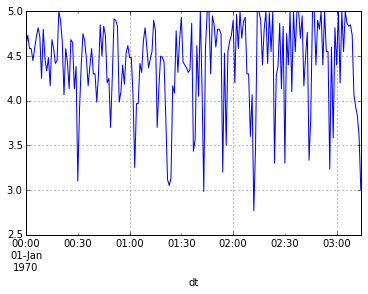

In [16]:
df.resample(rule='T', how='mean')['score'].plot()

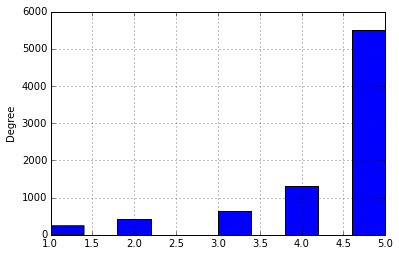

In [18]:
df['score'].plot(kind='hist')